<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [12]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [20]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()



#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [21]:
## Write your code here
# Check missing values in critical columns
df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()

# Impute missing values using the most frequent value (mode)
for col in ['Employment', 'JobSat', 'RemoteWork']:
    df[col] = df[col].fillna(df[col].mode()[0])

# Verify missing values have been handled
df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()



Employment    0
JobSat        0
RemoteWork    0
dtype: int64

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


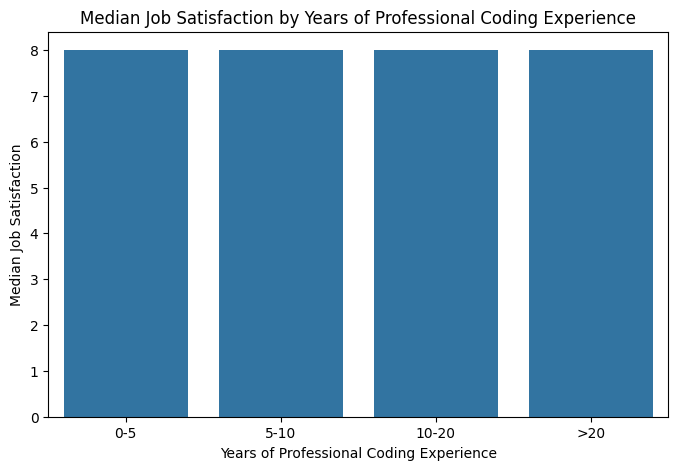

,count,mean,std,min,25%,50%,75%,max
ExperienceRange,,,,,,,,
0-5,17641.0,7.303894,1.672809,0.0,7.0,8.0,8.0,10.0
5-10,12653.0,7.353355,1.683669,0.0,7.0,8.0,8.0,10.0
10-20,11625.0,7.478624,1.616090,0.0,7.0,8.0,8.0,10.0
>20,6785.0,7.664849,1.481901,0.0,8.0,8.0,8.0,10.0


In [29]:
## Write your code here
# Create experience ranges using pandas-safe settings
bins = [0, 5, 10, 20, float('inf')]
labels = ['0-5', '5-10', '10-20', '>20']

df['ExperienceRange'] = pd.cut(
    df['YearsCodePro'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

median_jobsat = (
    df.groupby('ExperienceRange', observed=True)['JobSat']
    .median()
    .reset_index()
)

median_jobsat

plt.figure(figsize=(8, 5))
sns.barplot(
    data=median_jobsat,
    x='ExperienceRange',
    y='JobSat'
)

plt.title('Median Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction')
plt.show()

df['JobSat'].value_counts().sort_index()
df.groupby('ExperienceRange', observed=True)['JobSat'].describe()


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


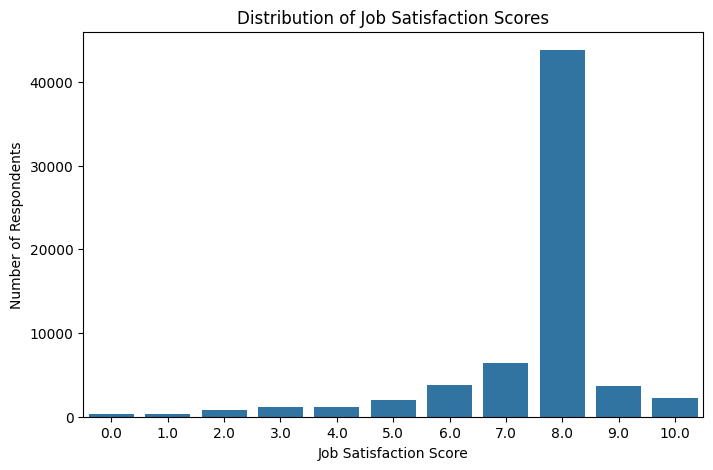

In [30]:
## Write your code here
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,
    x='JobSat',
    order=sorted(df['JobSat'].dropna().unique())
)

plt.title('Distribution of Job Satisfaction Scores')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Number of Respondents')
plt.show()


#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


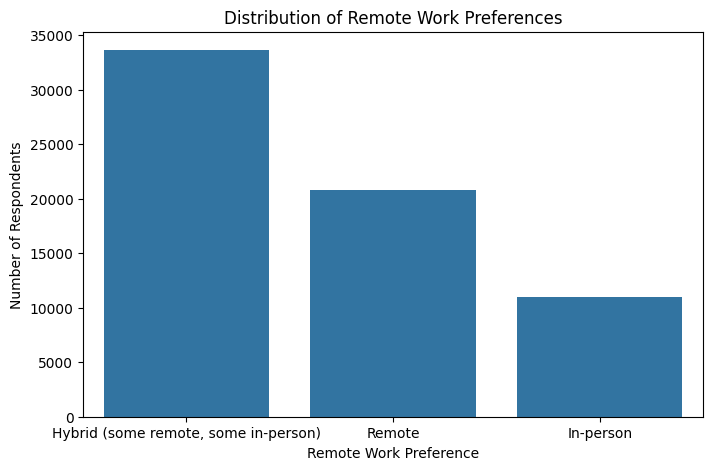

/tmp/ipykernel_299/2025797283.py:39: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


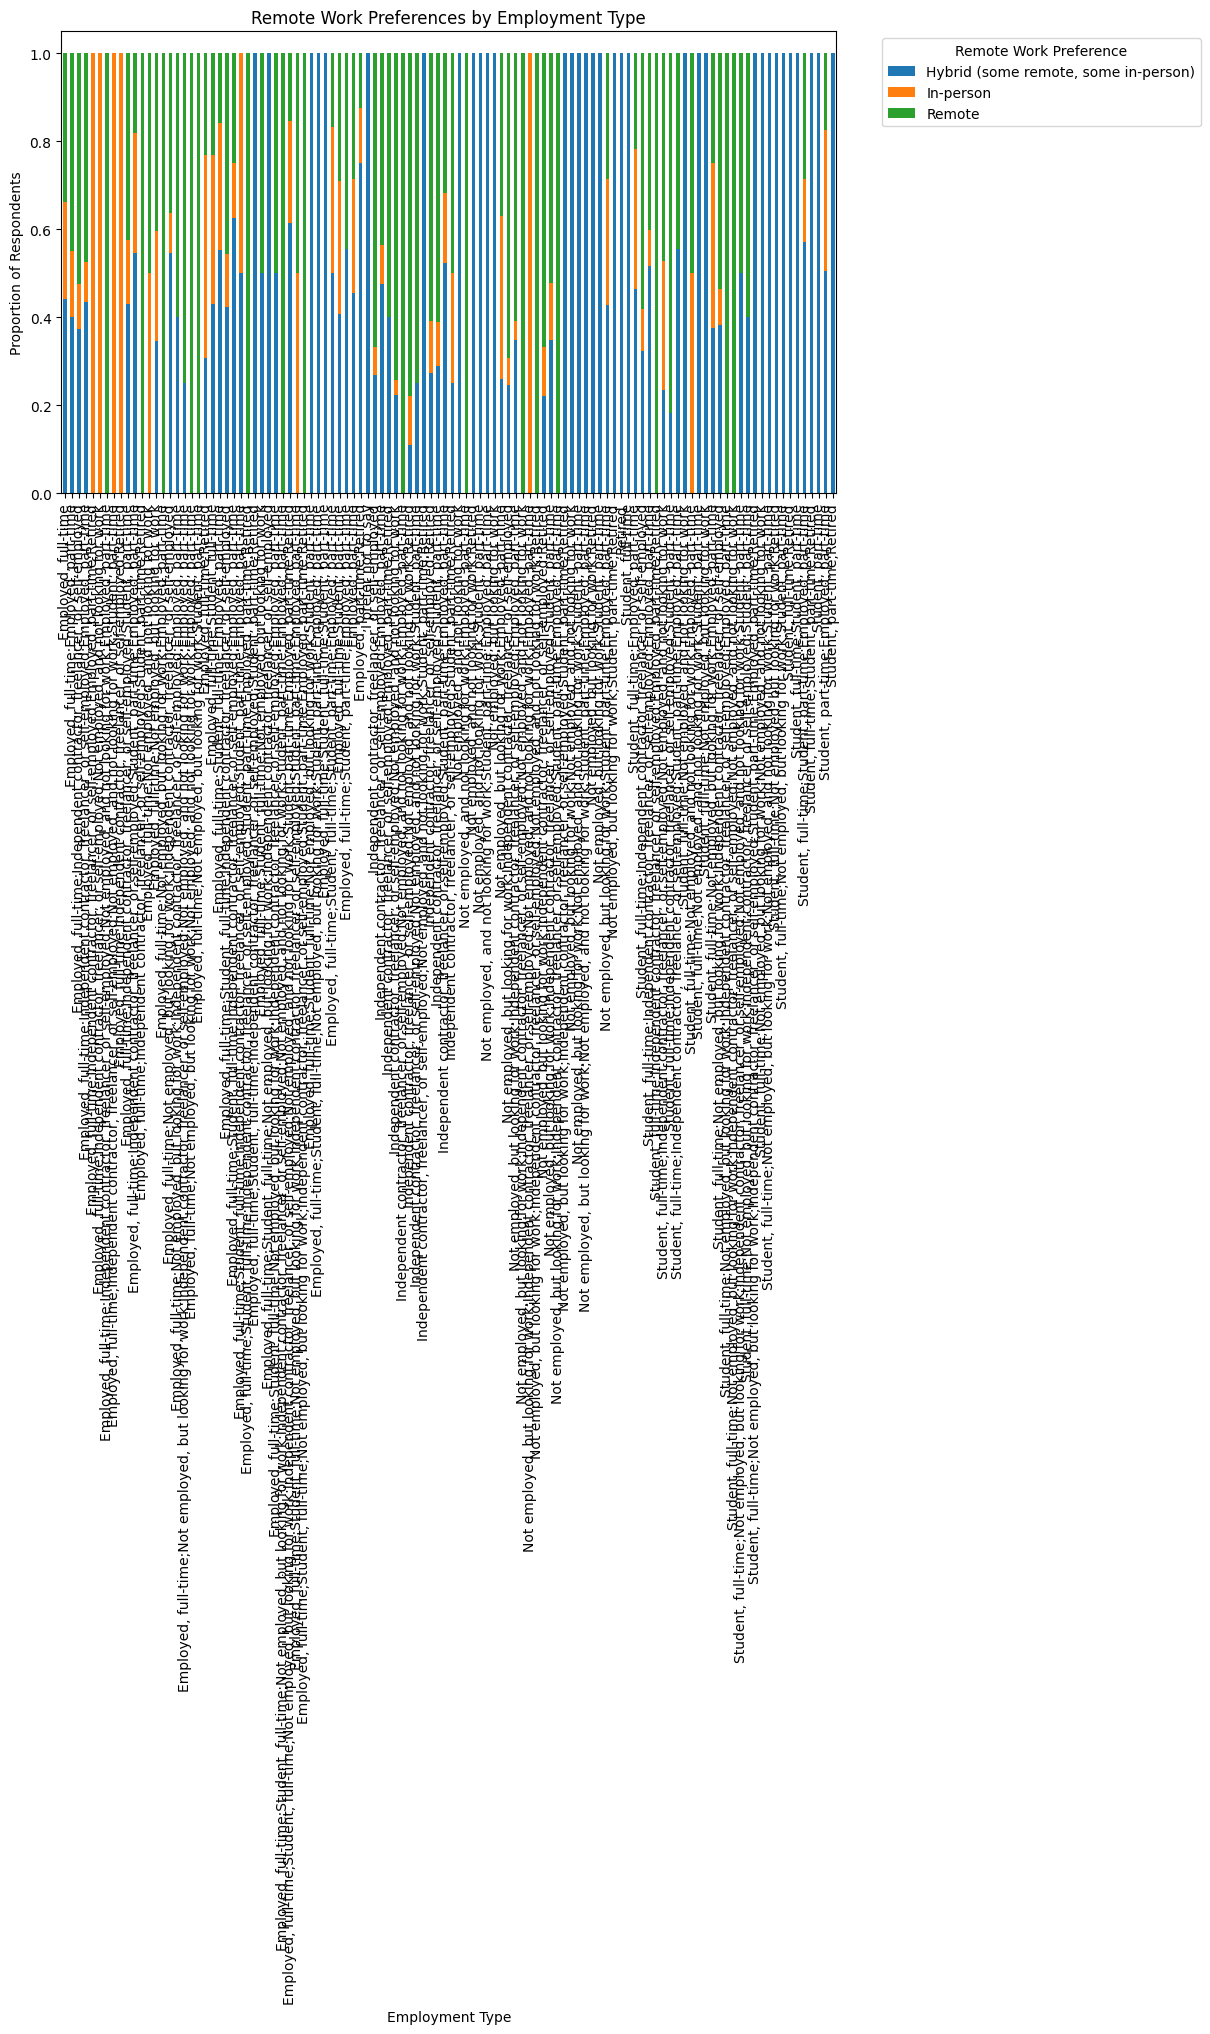

In [32]:
## Write your code here
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,
    x='RemoteWork',
    order=df['RemoteWork'].value_counts().index
)

plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Remote Work Preference')
plt.ylabel('Number of Respondents')
plt.show()

remote_by_employment = pd.crosstab(
    df['Employment'],
    df['RemoteWork']
)

remote_by_employment

remote_by_role = pd.crosstab(
    df['Employment'],
    df['RemoteWork'],
    normalize='index'
)

remote_by_role

remote_by_role.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6)
)

plt.title('Remote Work Preferences by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Proportion of Respondents')
plt.legend(title='Remote Work Preference', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


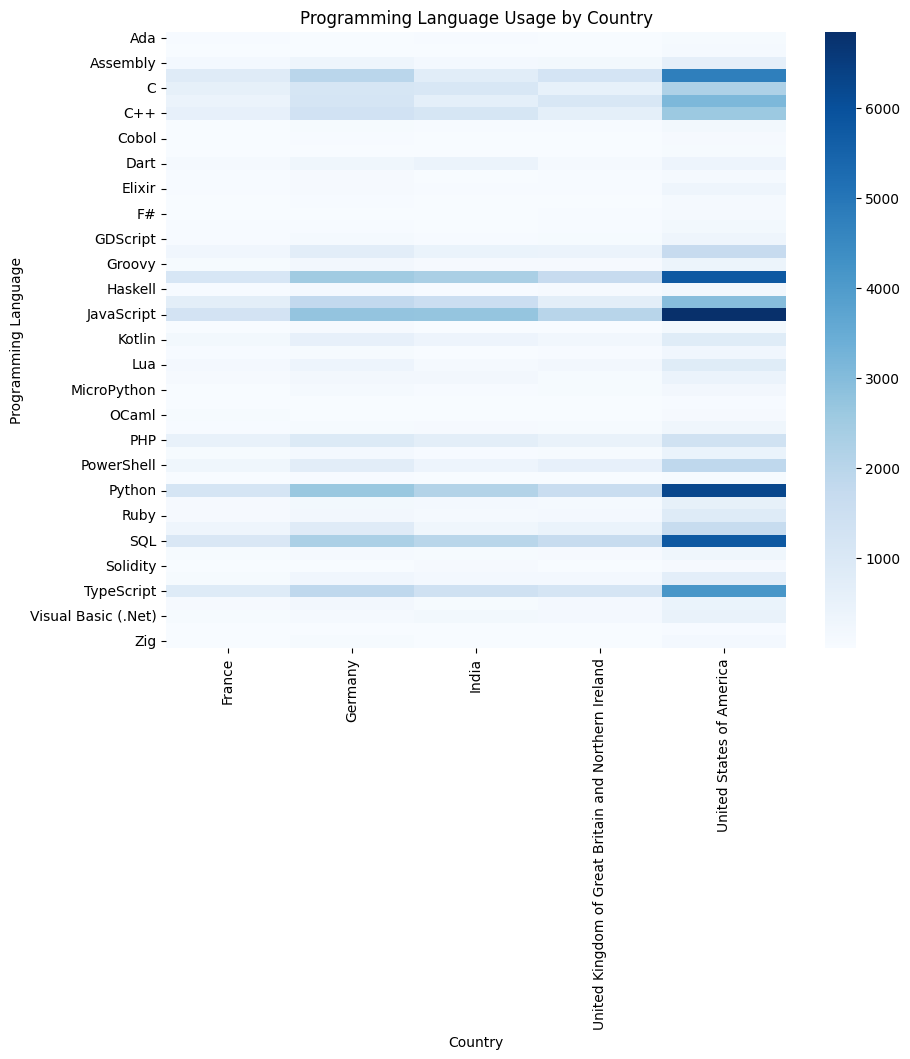

In [33]:
## Write your code here
lang_df = df[['Country', 'LanguageHaveWorkedWith']].dropna()
lang_df['LanguageHaveWorkedWith'] = lang_df['LanguageHaveWorkedWith'].str.split(';')
lang_df = lang_df.explode('LanguageHaveWorkedWith')
top_countries = lang_df['Country'].value_counts().head(5).index
lang_df = lang_df[lang_df['Country'].isin(top_countries)]
lang_counts = (
    lang_df
    .groupby(['Country', 'LanguageHaveWorkedWith'], observed=True)
    .size()
    .reset_index(name='Count')
)
lang_pivot = lang_counts.pivot(
    index='LanguageHaveWorkedWith',
    columns='Country',
    values='Count'
).fillna(0)
plt.figure(figsize=(10, 8))
sns.heatmap(
    lang_pivot,
    cmap='Blues'
)

plt.title('Programming Language Usage by Country')
plt.xlabel('Country')
plt.ylabel('Programming Language')
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


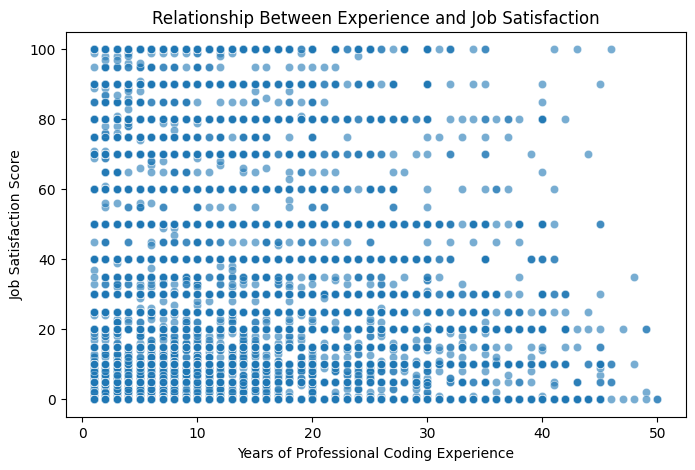

In [34]:
## Write your code here
corr_df = df[['YearsCodePro', 'JobSatPoints_1']].dropna()
corr_df['YearsCodePro'] = pd.to_numeric(
    corr_df['YearsCodePro'],
    errors='coerce'
)

corr_df = corr_df.dropna()
correlation = corr_df['YearsCodePro'].corr(corr_df['JobSatPoints_1'])
correlation
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=corr_df,
    x='YearsCodePro',
    y='JobSatPoints_1',
    alpha=0.6
)

plt.title('Relationship Between Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score')
plt.show()


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


/tmp/ipykernel_299/1919010568.py:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


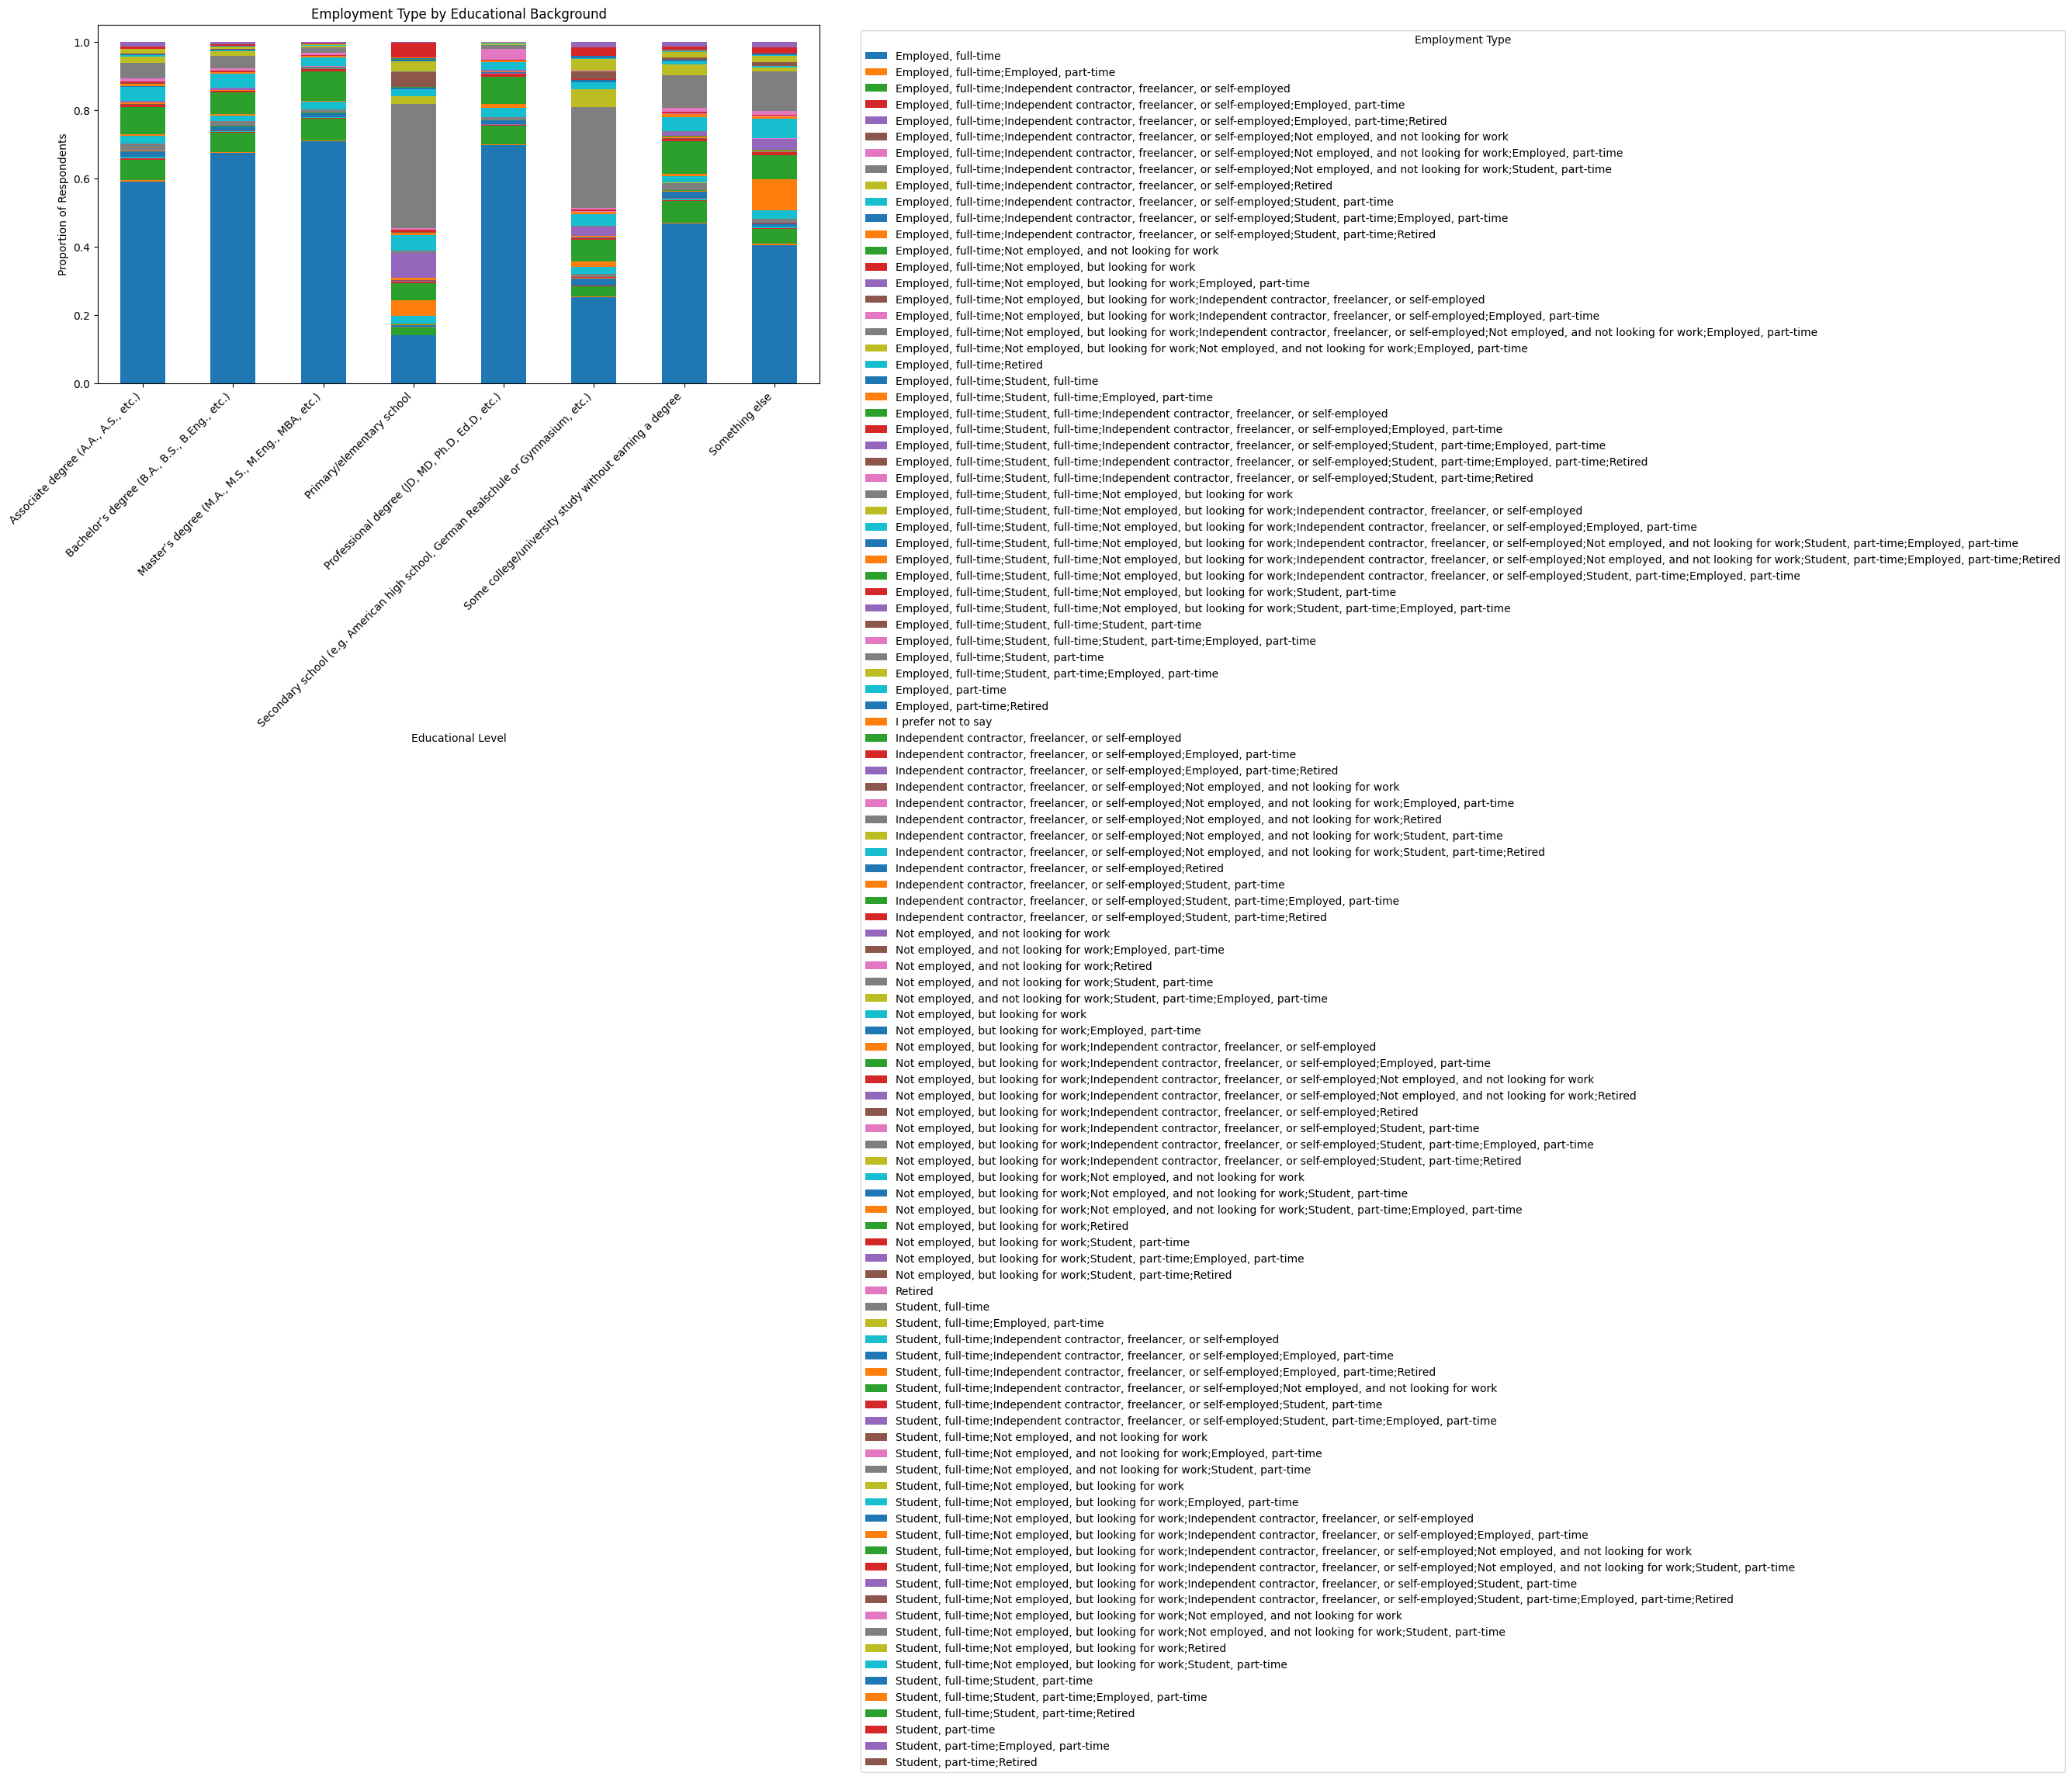

In [35]:
## Write your code here
edu_df = df[['EdLevel', 'Employment']].dropna()
edu_employment_ct = pd.crosstab(
    edu_df['EdLevel'],
    edu_df['Employment']
)

edu_employment_ct
edu_employment_norm = pd.crosstab(
    edu_df['EdLevel'],
    edu_df['Employment'],
    normalize='index'
)

edu_employment_norm
edu_employment_norm.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6)
)

plt.title('Employment Type by Educational Background')
plt.xlabel('Educational Level')
plt.ylabel('Proportion of Respondents')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [36]:
## Write your code here
# Save the cleaned and analyzed dataset
df.to_csv('cleaned_survey_data.csv', index=False)


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
